<a href="https://colab.research.google.com/github/Saw1b/ML-DL/blob/main/Coffee_BI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import roc_curve, auc

In [9]:
data = pd.read_csv('/content/Coffe_sales.csv')
data.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [10]:
data.sample(5)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
24,18,card,33.80,Americano with Milk,Night,Sun,Mar,7,3,2024-03-03,18:04:27.946000
1443,19,card,32.82,Cappuccino,Night,Wed,Sep,3,9,2024-09-11,19:53:12.537000
508,12,card,37.72,Latte,Afternoon,Sat,May,6,5,2024-05-25,12:13:53.388000
3225,17,card,25.96,Americano,Night,Fri,Feb,5,2,2025-02-28,17:32:16.632000
628,8,card,32.82,Americano with Milk,Morning,Thu,Jun,4,6,2024-06-06,08:54:08.455000


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
data['Date']=pd.to_datetime(data['Date'])

In [13]:
data['Time']=pd.to_datetime(data['Time'])
data['Hour']=data['Time'].dt.hour

/tmp/ipython-input-2480628321.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time']=pd.to_datetime(data['Time'])


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         3547 non-null   datetime64[ns]
 10  Time         3547 non-null   datetime64[ns]
 11  Hour         3547 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(3), object(5)
memory usage: 318.8+ KB


In [16]:
data.sample(10)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Hour
2196,19,card,35.76,Hot Chocolate,Night,Mon,Nov,1,11,2024-11-11,2025-08-30 19:04:15.528,19
1275,13,card,23.02,Americano,Afternoon,Fri,Aug,5,8,2024-08-23,2025-08-30 13:24:54.748,13
849,17,card,32.82,Latte,Night,Sun,Jul,7,7,2024-07-07,2025-08-30 17:07:50.284,17
2215,10,card,25.96,Americano,Morning,Thu,Nov,4,11,2024-11-14,2025-08-30 10:06:42.680,10
1786,7,card,30.86,Americano with Milk,Morning,Fri,Oct,5,10,2024-10-11,2025-08-30 07:54:51.580,7
1485,7,card,23.02,Cortado,Morning,Tue,Sep,2,9,2024-09-17,2025-08-30 07:54:57.927,7
2899,12,card,35.76,Cocoa,Afternoon,Fri,Feb,5,2,2025-02-07,2025-08-30 12:09:38.592,12
1445,20,card,32.82,Latte,Night,Wed,Sep,3,9,2024-09-11,2025-08-30 20:14:18.886,20
1219,16,card,23.02,Cortado,Afternoon,Sat,Aug,6,8,2024-08-17,2025-08-30 16:31:54.837,16
2731,20,card,35.76,Cappuccino,Night,Mon,Jan,1,1,2025-01-20,2025-08-30 20:26:24.881,20


In [17]:
data['cash_type'].unique()

array(['card'], dtype=object)

In [18]:
# 1 Her Bir Kahve Tipinin En Çok Sattığı Günler
# 2 Her Bir Kahve Tipinin En Çok Sattığı Saat Dilimi
# Kahve Tiplerinden Elden Edilen Gelirin Dağılımı ---> Kırılım Gün


In [19]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)

No of row =  3547
No of col =  12


In [20]:
select_col = ['hour_of_day', 'Weekdaysort', 'Monthsort']

In [21]:
select_col_df = data[['hour_of_day', 'Weekdaysort', 'Monthsort']]
select_col_df = select_col_df.describe()
select_col_df

,hour_of_day,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000
mean,14.185791,3.845785,6.453905
std,4.234010,1.971501,3.500754
min,6.000000,1.000000,1.000000
25%,10.000000,2.000000,3.000000
50%,14.000000,4.000000,7.000000
75%,18.000000,6.000000,10.000000
max,22.000000,7.000000,12.000000


<Figure size 500x500 with 0 Axes>

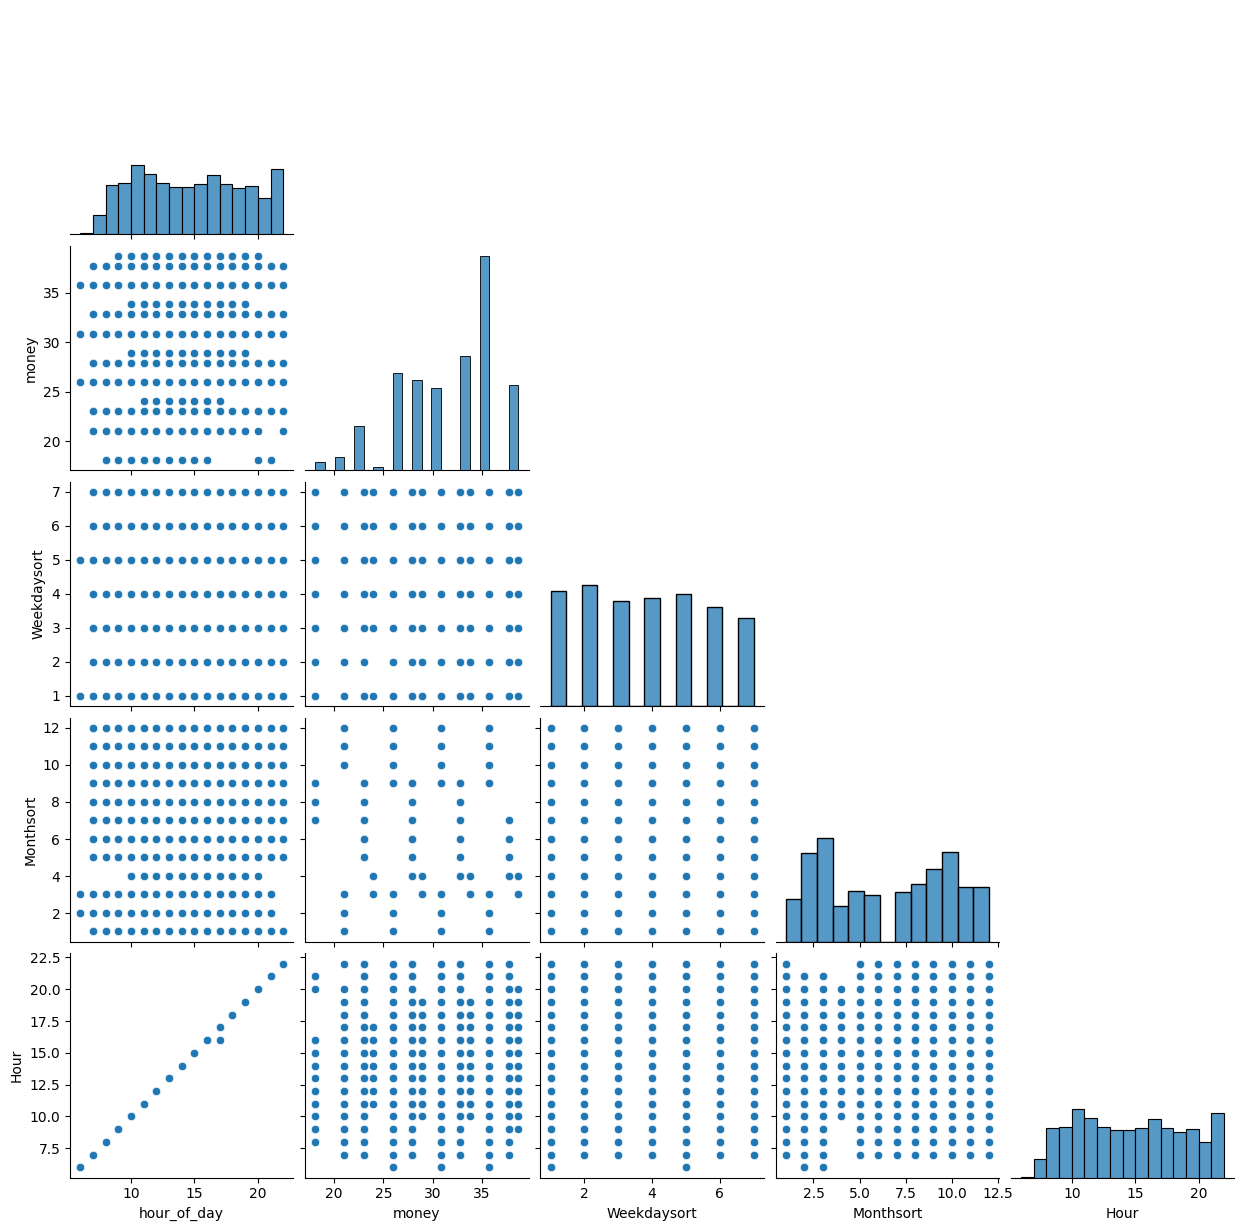

In [22]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.pairplot(data=data , corner=True)
plt.show()

In [23]:
print(data['hour_of_day'].median())
print(data['Weekdaysort'].median())
print(data['Monthsort'].median())


14.0
4.0
7.0


In [24]:
data['hour_of_day'] = data['hour_of_day'].replace(0, data['hour_of_day'].median())
data['Weekdaysort'] = data['Weekdaysort'].replace(0, data['Weekdaysort'].median())
data['Monthsort'] = data['Monthsort'].replace(0, data['Monthsort'].median())

data.describe()

,hour_of_day,money,Weekdaysort,Monthsort,Date,Time,Hour
count,3547.000000,3547.000000,3547.000000,3547.000000,3547,3547,3547.000000
mean,14.185791,31.645216,3.845785,6.453905,2024-10-04 17:34:43.676346368,2025-08-30 14:40:36.033833728,14.185509
min,6.000000,18.120000,1.000000,1.000000,2024-03-01 00:00:00,2025-08-30 06:50:04.455000,6.000000
25%,10.000000,27.920000,2.000000,3.000000,2024-07-17 12:00:00,2025-08-30 10:57:06.298000128,10.000000
50%,14.000000,32.820000,4.000000,7.000000,2024-10-10 00:00:00,2025-08-30 14:31:28.740999936,14.000000
75%,18.000000,35.760000,6.000000,10.000000,2025-01-11 00:00:00,2025-08-30 18:11:31.387500032,18.000000
max,22.000000,38.700000,7.000000,12.000000,2025-03-23 00:00:00,2025-08-30 22:59:18.544000,22.000000
std,4.234010,4.877754,1.971501,3.500754,NaN,NaN,4.233855


In [25]:
data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Hour
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,2025-08-30 10:15:50.520,10
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-08-30 12:19:22.539,12
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-08-30 12:20:18.089,12
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,2025-08-30 13:46:33.006,13
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,2025-08-30 13:48:14.626,13
...,...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,2025-08-30 10:34:54.894,10
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,2025-08-30 14:43:37.362,14
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,2025-08-30 14:44:16.864,14
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,2025-08-30 15:47:28.723,15


In [26]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1yprE1zCxYxu5v9fvvT5Jq4dr_MXjal_zoz7BBpdYG8A/edit#gid=0


In [33]:

coffee_per_day = data.groupby(['coffee_name', 'Weekday','Month_name'])['money'].sum().reset_index()
most_sold_day_per_coffee = coffee_per_day.loc[coffee_per_day.groupby('coffee_name')['money'].idxmax()]

print("Days with the highest sales for each coffee type:")
display(most_sold_day_per_coffee)


Days with the highest sales for each coffee type:


,coffee_name,Weekday,Month_name,money
7,Americano,Fri,Mar,747.46
115,Americano with Milk,Sat,Mar,772.98
222,Cappuccino,Thu,May,528.08
259,Cocoa,Fri,Oct,500.64
335,Cortado,Sat,Aug,299.26
447,Espresso,Wed,Mar,135.18
503,Hot Chocolate,Thu,Oct,643.68
545,Latte,Mon,Oct,858.24


In [34]:
coffee_counts = data['coffee_name'].value_counts()
display(coffee_counts)

,count
coffee_name,
Americano with Milk,809
Latte,757
Americano,564
Cappuccino,486
Cortado,287
Hot Chocolate,276
Cocoa,239
Espresso,129


In [44]:
data = data.rename(columns = {'hour_of_day':'Hour','Time_of_day':'Period'})
#data

In [49]:
data_with_dummies = pd.get_dummies(data, columns=['coffee_name'], drop_first=True)
corrs = data_with_dummies.corr(numeric_only=True)
corrs

,Hour,money,Weekdaysort,Monthsort,Hour
Hour,NaN,NaN,NaN,NaN,NaN
money,NaN,NaN,NaN,NaN,NaN
Weekdaysort,NaN,NaN,NaN,NaN,NaN
Monthsort,NaN,NaN,NaN,NaN,NaN
Hour,NaN,NaN,NaN,NaN,NaN


In [50]:
# Now, the correlation matrix includes dummy variables for coffee types.
# You can explore correlations between numerical columns and specific coffee types.
# For example, to see correlations with "Latte":
# corr_with_latte = corrs['coffee_name_Latte'].sort_values(ascending=False)
# display(corr_with_latte)

# Or to see correlations with all dummy variables:
display(corrs)

,Hour,money,Weekdaysort,Monthsort,Hour
Hour,NaN,NaN,NaN,NaN,NaN
money,NaN,NaN,NaN,NaN,NaN
Weekdaysort,NaN,NaN,NaN,NaN,NaN
Monthsort,NaN,NaN,NaN,NaN,NaN
Hour,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


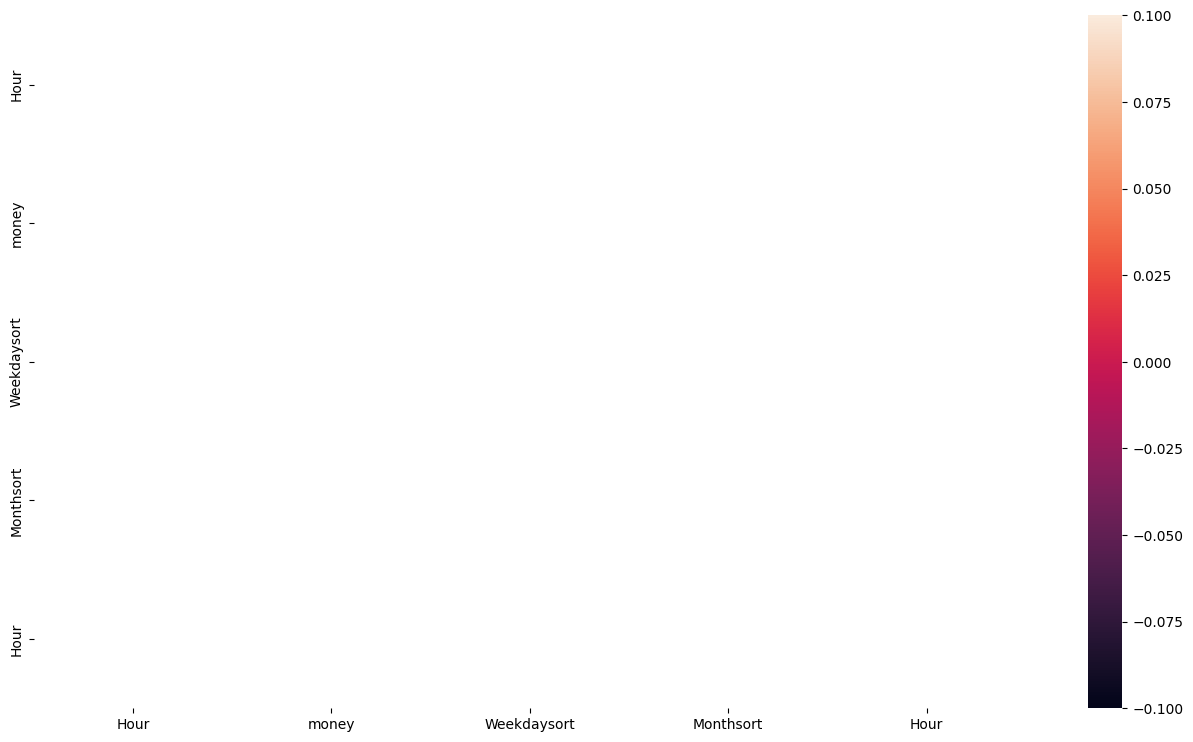

In [52]:
plt.figure(figsize=(16,9))
corrs
sns.heatmap(corrs, annot=True)
plt.show()


In [56]:
# Re-load the data from the CSV file
data = pd.read_csv('/content/Coffe_sales.csv')

# training and normalization of data
X = data.drop(['cash_type', 'Time_of_Day', 'Weekday', 'Month_name', 'Date', 'Time', 'coffee_name'], axis=1) # Dropping non-numerical and unnecessary columns
Y = data['coffee_name'] # Using 'coffee_name' as the target variable

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

SScaler = StandardScaler()
X_train = SScaler.fit_transform(X_train)
X_test = SScaler.fit_transform(X_test)

In [57]:
X_test


array([[ 1.65013824, -1.75029488,  0.06907106,  0.70621342],
       [ 0.22656819, -1.14379934, -0.94207235, -1.02179874],
       [ 0.70109154,  0.87785247, -1.44764406, -1.02179874],
       ...,
       [ 0.46382986,  0.87785247, -0.94207235, -1.02179874],
       [-0.24795516,  0.87785247, -1.44764406, -1.30980076],
       [ 1.41287656,  0.27135693,  1.08021448,  0.70621342]])

In [58]:
Y_test

,coffee_name
1457,Americano
3458,Americano
3260,Hot Chocolate
790,Cortado
705,Hot Chocolate
...,...
1125,Americano
2123,Americano with Milk
3367,Hot Chocolate
2934,Cocoa


In [59]:
X_train

array([[-1.23214343, -0.16798581,  0.58827782,  1.01789683],
       [-0.28815453, -0.16798581, -1.44268559, -1.26334999],
       [-0.76014898, -1.17130317, -0.42720388, -1.26334999],
       ...,
       [ 0.65583438,  0.23334113, -0.93494473,  0.44758513],
       [ 0.65583438,  1.43732196,  1.09601867, -0.69303828],
       [-1.46814066, -0.76997622,  1.09601867,  0.44758513]])

In [60]:
Y_train

,coffee_name
1696,Americano with Milk
2935,Americano with Milk
2863,Americano
1232,Americano
1248,Latte
...,...
2763,Cappuccino
905,Latte
1096,Latte
235,Cappuccino


In [62]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)

SVC()

In [63]:
X_test

array([[ 1.65013824, -1.75029488,  0.06907106,  0.70621342],
       [ 0.22656819, -1.14379934, -0.94207235, -1.02179874],
       [ 0.70109154,  0.87785247, -1.44764406, -1.02179874],
       ...,
       [ 0.46382986,  0.87785247, -0.94207235, -1.02179874],
       [-0.24795516,  0.87785247, -1.44764406, -1.30980076],
       [ 1.41287656,  0.27135693,  1.08021448,  0.70621342]])

In [64]:
Y_test

,coffee_name
1457,Americano
3458,Americano
3260,Hot Chocolate
790,Cortado
705,Hot Chocolate
...,...
1125,Americano
2123,Americano with Milk
3367,Hot Chocolate
2934,Cocoa


In [75]:
Y_pred = svc.predict(X_test)
#Y_pred

In [66]:
#test accu
svc_accuracy= round(accuracy_score(Y_test,Y_pred),4)*100 # Accuracy
svc_accuracy

62.96000000000001

In [71]:

prediction_data = X_test[55:56]
display(prediction_data)

array([[ 1.65013824, -0.73946898, -1.44764406,  0.41821139]])

In [74]:
prediction_data = Y_test[55:56]
prediction_data

,coffee_name
1162,Americano with Milk


In [77]:
hour_of_day = int(input("Enter hour of day (6-22) = "))
money = float(input("Enter money spent = "))
Weekdaysort = int(input("Enter Weekday sort (1-7) = "))
Monthsort = int(input("Enter Month sort (1-12) = "))

# Create a DataFrame with the new data, ensuring column order matches X_train
new_data = pd.DataFrame([[hour_of_day, money, Weekdaysort, Monthsort]],
                        columns=['hour_of_day', 'money', 'Weekdaysort', 'Monthsort'])

# Scale the new data using the same scaler fitted on the training data
new_data_scaled = SScaler.transform(new_data)


Enter hour of day (6-22) = 6
Enter money spent = 200
Enter Weekday sort (1-7) = 2
Enter Month sort (1-12) = 4
Based on the input, the predicted coffee type is: Americano with Milk


In [78]:
d = pd.DataFrame(new_data)

In [79]:
d


,hour_of_day,money,Weekdaysort,Monthsort
0,6,200.0,2,4


In [80]:
Y_score = svc.predict(d)
print(Y_score)

['Americano with Milk']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


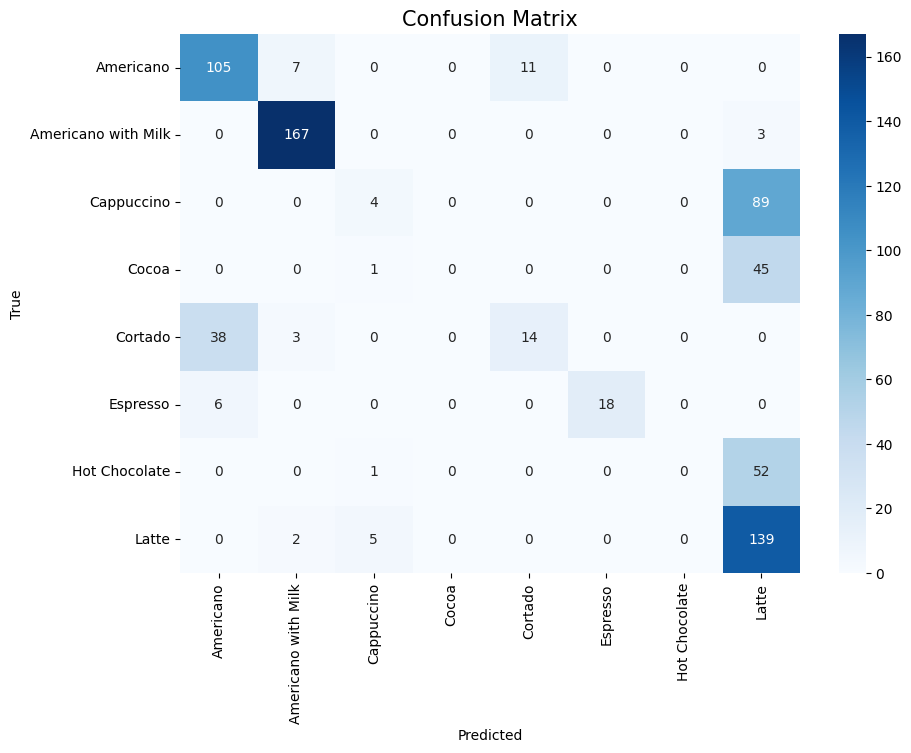

In [88]:


# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Get the unique class labels from the test set
class_labels = Y_test.unique()
class_labels.sort() # Sort labels for consistent order in the matrix

# Create a DataFrame for the confusion matrix with labels
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix", fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [87]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
                     precision    recall  f1-score   support

          Americano       0.70      0.85      0.77       123
Americano with Milk       0.93      0.98      0.96       170
         Cappuccino       0.36      0.04      0.08        93
              Cocoa       0.00      0.00      0.00        46
            Cortado       0.56      0.25      0.35        55
           Espresso       1.00      0.75      0.86        24
      Hot Chocolate       0.00      0.00      0.00        53
              Latte       0.42      0.95      0.59       146

           accuracy                           0.63       710
          macro avg       0.50      0.48      0.45       710
       weighted avg       0.56      0.63      0.55       710



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
